<a href="https://colab.research.google.com/github/Moxammed/Data-Science-and-ML/blob/main/7_Digits_Recognition_using_mnist_Dense_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras

(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

#Learn the Shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#See the values inside
print(X_train[0])
print(y_train[0])

#Make the inside values smaller for better performance and training. nn works with small numbers better
X_train = X_train / 255
X_test = X_test / 255

print(X_train[0])
print(y_train[0])

#Now flatten the X
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0 

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(256, input_shape=(784,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8947 - loss: 0.3610
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9750 - loss: 0.0838
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9814 - loss: 0.0564
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9868 - loss: 0.0403
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9900 - loss: 0.0311
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9913 - loss: 0.0260
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9936 - loss: 0.0208
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9940 - loss: 0.0170
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9949 - loss: 0.0152
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9961 - loss: 0.0116


In [28]:
# Get total accuracy of the evaluation (untrained data)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9725 - loss: 0.1172
Test accuracy: 97.79%


In [29]:
predictions = model.predict(X_test)

# Single Sample to check
predicted_digit = np.argmax(predictions[0])
true_digit = y_test[0]

print("Predicted:", predicted_digit)
print("True:", true_digit)

# 10 Samples to check
for i in range(10):
    predicted_digit = np.argmax(predictions[i])
    true_digit = y_test[i]
    print(f"Sample {i + 1}: Predicted: {predicted_digit}, True: {true_digit}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted: 7
True: 7
Sample 1: Predicted: 7, True: 7
Sample 2: Predicted: 2, True: 2
Sample 3: Predicted: 1, True: 1
Sample 4: Predicted: 0, True: 0
Sample 5: Predicted: 4, True: 4
Sample 6: Predicted: 1, True: 1
Sample 7: Predicted: 4, True: 4
Sample 8: Predicted: 9, True: 9
Sample 9: Predicted: 5, True: 5
Sample 10: Predicted: 9, True: 9


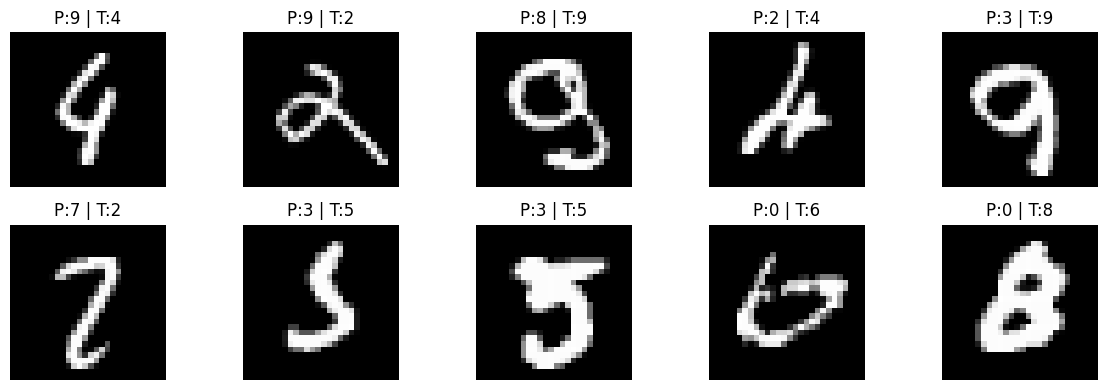

In [30]:

# Find misclassified indices
predicted_labels = np.argmax(predictions, axis=1)
wrong_indices = np.where(predicted_labels != y_test)[0]

plt.figure(figsize=(12, 4))
for i, idx in enumerate(wrong_indices[:10]):
    plt.subplot(2, 5, i + 1)

    # Reshape flattened image back to 28x28
    img = X_test[idx].reshape(28, 28)

    plt.imshow(img, cmap='gray')
    plt.title(f"P:{predicted_labels[idx]} | T:{y_test[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [31]:
import numpy as np

mistake_counts = {}

for digit in range(10):
    idx = np.where(y_test == digit)[0]
    mistakes = np.sum(predicted_labels[idx] != digit)
    mistake_counts[digit] = mistakes

sorted_mistakes = sorted(mistake_counts.items(), key=lambda x: x[1], reverse=True)

print("Digits with most mistakes (descending):")
for digit, count in sorted_mistakes:
    print(f"Digit {digit}: {count} mistakes")

Digits with most mistakes (descending):
Digit 7: 43 mistakes
Digit 5: 40 mistakes
Digit 9: 35 mistakes
Digit 8: 23 mistakes
Digit 2: 22 mistakes
Digit 6: 16 mistakes
Digit 0: 13 mistakes
Digit 4: 13 mistakes
Digit 1: 8 mistakes
Digit 3: 8 mistakes
